ПИ19-3 Деменчук Георгий<br>Практическая работа №5

# 5. Классификация текстов при помощи сетей прямого распространения

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

## 1. Представление и предобработка текстовых данных 

1.1 Операции по предобработке:
* токенизация
* стемминг / лемматизация
* удаление стоп-слов
* удаление пунктуации
* приведение к нижнему регистру
* любые другие операции над текстом

In [1]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import re
import string

import torch
import nltk
from nltk.corpus import stopwords, wordnet

In [2]:
text = 'Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'

Реализовать функцию `preprocess_text(text: str) -> str`, которая:
* приводит строку к нижнему регистру
* заменяет все символы, кроме a-z, A-Z и знаков .,!? на пробел


In [3]:
punctuation = set(string.punctuation)
stop_words = set(stopwords.words("english"))
lemmatizer = nltk.WordNetLemmatizer()

In [4]:
#Функция для трансляции имен с nltk в wordnet
def custom_pos(word: str) -> str:
    tag = nltk.pos_tag([word])[0][1]
    
    tags_router = {
     'CD': wordnet.NOUN,
     'JJ': wordnet.ADJ, 
     'JJS': wordnet.ADJ, 
     'MD' : wordnet.NOUN,
     'NN': wordnet.NOUN,
     'NNS': wordnet.NOUN,
     'RB': wordnet.ADV,
     'VB' : wordnet.VERB,
     'VBD': wordnet.VERB,
     'VBG': wordnet.VERB,
     'VBN': wordnet.VERB,
     'VBZ': wordnet.VERB,
    }
    
    return tags_router.get(tag, wordnet.NOUN)

In [5]:
def preprocess_text(text: str) -> str:
    re_pattern = r'[^a-zA-Z0-9.,!?\s]'
    text = text.lower()
    items = re.sub(string = text, pattern = re_pattern, repl = '')
    
    #Как по мне, все условия задания уже выполняются, но вроде как говорили о том, что надо еще лемму использовать
    sentences = []
    for sentence in nltk.sent_tokenize(text):
        words = []
        for word in nltk.word_tokenize(sentence):
            if word not in stop_words and word not in punctuation:
                lemma = lemmatizer.lemmatize(word, pos=custom_pos(word))
                words.append(lemma)
        sentences.append(" ".join(words))
    text = ". ".join(sentences)
    return text

In [6]:
preprocess_text(text)

'select preference run install command. stable represent currently test support version pytorch. note libtorch available c++'

In [7]:
preprocess_text("Ploho & Молчат дома - По краю острова [2019].")

'ploho молчат дома по краю острова 2019'

1.2 Представление текстовых данных при помощи бинарного кодирования


Представить первое предложение из `text` в виде тензора `sentence_t`: `sentence_t[i] == 1`, если __слово__ с индексом `i` присуствует в предложении.

In [8]:
processed_item = preprocess_text(text)
processed_item

'select preference run install command. stable represent currently test support version pytorch. note libtorch available c++'

In [9]:
#Получаем все слова для нашего алфавита
alphabet = list(set(nltk.word_tokenize(processed_item)) | set(".")) 
alphabet

['represent',
 'pytorch',
 'run',
 'libtorch',
 'select',
 'test',
 'preference',
 'note',
 'support',
 'stable',
 'command',
 'c++',
 'currently',
 'available',
 'install',
 '.',
 'version']

In [10]:
word_to_idx = {word: i for i, word in enumerate(alphabet)}
word_to_idx

{'represent': 0,
 'pytorch': 1,
 'run': 2,
 'libtorch': 3,
 'select': 4,
 'test': 5,
 'preference': 6,
 'note': 7,
 'support': 8,
 'stable': 9,
 'command': 10,
 'c++': 11,
 'currently': 12,
 'available': 13,
 'install': 14,
 '.': 15,
 'version': 16}

In [11]:
#Берем только первое предложение
sentence = nltk.sent_tokenize(processed_item)[0]
sentence

'select preference run install command.'

In [12]:
#Заполняем тензор нулями на длинну нашего алфавита
res_tensor = torch.zeros(len(alphabet))
res_tensor

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
#Получаем индекы распознанных слов
word_indices = [word_to_idx[w] for w in nltk.word_tokenize(sentence)]
word_indices

[4, 6, 2, 14, 10, 15]

In [14]:
#Где есть индексы - проставляем 1 и 
res_tensor[word_indices] = 1
res_tensor

tensor([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.])

## 2. Классификация фамилий по национальности

Датасет: https://disk.yandex.ru/d/owHew8hzPc7X9Q?w=1

2.1 Считать файл `surnames/surnames.csv`. 

2.2 Закодировать национальности числами, начиная с 0.

2.3 Разбить датасет на обучающую и тестовую выборку

2.4 Реализовать класс `Vocab` (токен = __символ__)

2.5 Реализовать класс `SurnamesDataset`

2.6. Обучить классификатор.

2.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: прогнать несколько фамилий студентов группы через модели и проверить результат. Для каждой фамилии выводить 3 наиболее вероятных предсказания.

2.1 Считать файл `surnames/surnames.csv`.

In [15]:
import pandas as pd
df = pd.read_csv("./data/surnames.csv")
df

,surname,nationality
0,Woodford,English
1,Coté,French
2,Kore,English
3,Koury,Arabic
4,Lebzak,Russian
...,...,...
10975,Quraishi,Arabic
10976,Innalls,English
10977,Król,Polish
10978,Purvis,English


2.2 Закодировать национальности числами, начиная с 0.

In [16]:
nationalities = df["nationality"].unique()
nationalities

array(['English', 'French', 'Arabic', 'Russian', 'Japanese', 'Chinese',
       'Italian', 'Czech', 'Irish', 'German', 'Greek', 'Spanish',
       'Polish', 'Dutch', 'Vietnamese', 'Korean', 'Portuguese',
       'Scottish'], dtype=object)

In [17]:
vocab_nat = {item: number for number, item in enumerate(nationalities)}
vocab_nat

{'English': 0,
 'French': 1,
 'Arabic': 2,
 'Russian': 3,
 'Japanese': 4,
 'Chinese': 5,
 'Italian': 6,
 'Czech': 7,
 'Irish': 8,
 'German': 9,
 'Greek': 10,
 'Spanish': 11,
 'Polish': 12,
 'Dutch': 13,
 'Vietnamese': 14,
 'Korean': 15,
 'Portuguese': 16,
 'Scottish': 17}

In [18]:
reverse_nat = {number: item for number, item in enumerate(nationalities)}
reverse_nat

{0: 'English',
 1: 'French',
 2: 'Arabic',
 3: 'Russian',
 4: 'Japanese',
 5: 'Chinese',
 6: 'Italian',
 7: 'Czech',
 8: 'Irish',
 9: 'German',
 10: 'Greek',
 11: 'Spanish',
 12: 'Polish',
 13: 'Dutch',
 14: 'Vietnamese',
 15: 'Korean',
 16: 'Portuguese',
 17: 'Scottish'}

In [19]:
df["label"] = df["nationality"].map(vocab_nat)
df

,surname,nationality,label
0,Woodford,English,0
1,Coté,French,1
2,Kore,English,0
3,Koury,Arabic,2
4,Lebzak,Russian,3
...,...,...,...
10975,Quraishi,Arabic,2
10976,Innalls,English,0
10977,Król,Polish,12
10978,Purvis,English,0


In [20]:
targets=torch.tensor(df["label"], dtype=torch.long)
targets

tensor([ 0,  1,  0,  ..., 12,  0,  9])

2.4 Реализовать класс `Vocab` (токен = __символ__)

In [21]:
#Класс, который поможет нам с переводом национальностей в цифры
class Vocab:
    
    def __init__(self, data):
        
        self.idx_to_token = {}
        self.token_to_idx = {}
        self.gennerate_vocab(data)
        self.vocab_len = len(self.token_to_idx)
    
    
    def add_token(self, token):
        if token not in self.token_to_idx:
            self.token_to_idx[token] = len(self.token_to_idx)
            self.idx_to_token[len(self.idx_to_token)] = token
            
    def gennerate_vocab(self, data):
        for surname in data:
            for char in preprocess_text(surname):
                self.add_token(char)

In [22]:
data = df["surname"].unique().astype('str')
data

array(['Woodford', 'Coté', 'Kore', ..., 'Król', 'Purvis', 'Messerli'],
      dtype='<U17')

In [23]:
vocab = Vocab(data)
vocab.idx_to_token

{0: 'w',
 1: 'o',
 2: 'd',
 3: 'f',
 4: 'r',
 5: 'c',
 6: 't',
 7: 'é',
 8: 'k',
 9: 'e',
 10: 'u',
 11: 'y',
 12: 'l',
 13: 'b',
 14: 'z',
 15: 'a',
 16: 'i',
 17: 'n',
 18: 'h',
 19: 'm',
 20: 's',
 21: 'v',
 22: 'p',
 23: 'g',
 24: 'j',
 25: "'",
 26: 'q',
 27: 'à',
 28: 'x',
 29: 'ü',
 30: '-',
 31: 'í',
 32: 'ú',
 33: 'ä',
 34: 'ö',
 35: 'ó',
 36: '1',
 37: 'ò',
 38: 'ñ',
 39: 'ż',
 40: 'ß',
 41: 'á',
 42: 'è',
 43: 'ã',
 44: 'ê',
 45: 'ì',
 46: 'ś',
 47: 'ń',
 48: 'ù',
 49: 'ç',
 50: '/',
 51: 'õ',
 52: 'ą',
 53: 'ł'}

In [24]:
vocab.token_to_idx

{'w': 0,
 'o': 1,
 'd': 2,
 'f': 3,
 'r': 4,
 'c': 5,
 't': 6,
 'é': 7,
 'k': 8,
 'e': 9,
 'u': 10,
 'y': 11,
 'l': 12,
 'b': 13,
 'z': 14,
 'a': 15,
 'i': 16,
 'n': 17,
 'h': 18,
 'm': 19,
 's': 20,
 'v': 21,
 'p': 22,
 'g': 23,
 'j': 24,
 "'": 25,
 'q': 26,
 'à': 27,
 'x': 28,
 'ü': 29,
 '-': 30,
 'í': 31,
 'ú': 32,
 'ä': 33,
 'ö': 34,
 'ó': 35,
 '1': 36,
 'ò': 37,
 'ñ': 38,
 'ż': 39,
 'ß': 40,
 'á': 41,
 'è': 42,
 'ã': 43,
 'ê': 44,
 'ì': 45,
 'ś': 46,
 'ń': 47,
 'ù': 48,
 'ç': 49,
 '/': 50,
 'õ': 51,
 'ą': 52,
 'ł': 53}

2.5 Реализовать класс SurnamesDataset

In [25]:
from torch.utils.data import Dataset, DataLoader, random_split

In [26]:
class SurnamesDataset(Dataset):
    def __init__(self, X, y, vocab: Vocab):
        self.X = X
        self.y = y
        self.vocab = vocab
        
    def vectorize(self, surname):
        '''Генерирует представление фамилии surname в при помощи бинарного кодирования (см. 1.2)'''
        #Векторизируем с помощь вокаба, выдает вектор, которым будет закодирована фамилия'
        repr = torch.zeros(self.vocab.vocab_len)
        for char in preprocess_text(surname):
            idx = self.vocab.token_to_idx[char]
            repr[idx] = 1
        return repr
    
    def __getitem__(self, idx) -> tuple:
        return self.vectorize(self.X[idx]), targets[idx]
    
    def __len__(self) -> int:
        return len(self.X)
    
    def __str__(self) -> str:
        return f"SurnamesDataset with {self.__len__()} items"
    
    def y_len(self) -> int:
        return self.y.unique().shape[0]
        


2.3 Разбить датасет на обучающую и тестовую выборку

In [27]:
import torch

dataset = SurnamesDataset(
    df["surname"].tolist(),
    torch.tensor(df["label"], dtype=torch.long),
    vocab,
)


print(dataset)


train_size = int(len(dataset)*0.8)
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle = True, pin_memory=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size = 1, pin_memory = True)

print(f"train_size : {train_size}")
print(f"test_size : {test_size}")

SurnamesDataset with 10980 items
train_size : 8784
test_size : 2196


In [28]:
dataset.__getitem__(0)

(tensor([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor(0))

In [29]:
dataset.__getitem__(1)

(tensor([0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor(1))

2.6. Обучить классификатор.

Заимствуем методы с официальной документации для циклов train/test

In [30]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    loss_sum = 0
    for batch, (X, y) in enumerate(dataloader):

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_sum += loss
        if batch % 300 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
    return loss_sum / len(dataloader)


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [31]:
import torch.nn as nn

In [32]:

# Формируем модель
class NeuralNetwork(nn.Module):
    def __init__(self, in_features, out_features):
        super(NeuralNetwork, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Linear(512, out_features),
            nn.LogSoftmax(dim=1),
        )

    def forward(self, inputs):
        return self.seq(inputs)

In [33]:
import torch.optim as optim

In [34]:
# Определяем необходимые элементы для обучения
model = NeuralNetwork(vocab.vocab_len, dataset.y_len())
loss_fn = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
train_dataloader = DataLoader(train_dataset, batch_size=10)
test_dataloader = DataLoader(test_dataset, batch_size=10)

In [35]:
losses_plt = []

epochs = 40
losses = torch.empty(epochs)


for t in range(epochs): 
    print(f"Epoch {t+1}\n-------------------------------")
    buf = train_loop(train_dataloader, model, loss_fn, optimizer)
    losses[t] = buf
    losses_plt.append(buf.item())
    test_loop(test_dataloader, model, loss_fn)
    
print("Готов")

Epoch 1
-------------------------------
loss: 2.879417  [    0/ 8784]
loss: 2.527777  [ 3000/ 8784]
loss: 2.183519  [ 6000/ 8784]
Test Error: 
 Accuracy: 43.4%, Avg loss: 1.964054 

Epoch 2
-------------------------------
loss: 1.891361  [    0/ 8784]
loss: 2.469754  [ 3000/ 8784]
loss: 1.892259  [ 6000/ 8784]
Test Error: 
 Accuracy: 47.9%, Avg loss: 1.766407 

Epoch 3
-------------------------------
loss: 1.662814  [    0/ 8784]
loss: 2.360180  [ 3000/ 8784]
loss: 1.752230  [ 6000/ 8784]
Test Error: 
 Accuracy: 49.7%, Avg loss: 1.674069 

Epoch 4
-------------------------------
loss: 1.523750  [    0/ 8784]
loss: 2.260133  [ 3000/ 8784]
loss: 1.687978  [ 6000/ 8784]
Test Error: 
 Accuracy: 50.9%, Avg loss: 1.616394 

Epoch 5
-------------------------------
loss: 1.427259  [    0/ 8784]
loss: 2.174228  [ 3000/ 8784]
loss: 1.646566  [ 6000/ 8784]
Test Error: 
 Accuracy: 52.1%, Avg loss: 1.574752 

Epoch 6
-------------------------------
loss: 1.348535  [    0/ 8784]
loss: 2.103608  [ 30

2.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: прогнать несколько фамилий студентов группы через модели и проверить результат. Для каждой фамилии выводить 3 наиболее вероятных предсказания.

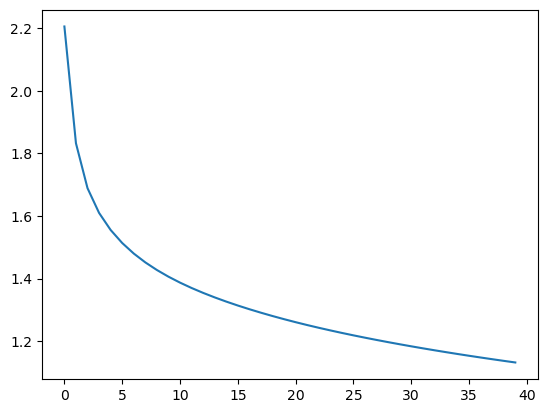

In [36]:
import matplotlib.pyplot as plt

plt.plot(torch.arange(len(losses_plt)), losses_plt)

График ошибки снижается -> все делаю верно

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
test_loop(dataloader=test_dataloader, model=model, loss_fn=loss_fn);

Test Error: 
 Accuracy: 61.8%, Avg loss: 1.265110 



In [39]:
# Получаем данные с тестовой выборки
y_pred = []
y_true = []

for inputs, labels in test_dataloader:
    output = model(inputs) # Feed Network
    output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
    y_pred.extend(output) # Save Prediction
    labels = labels.data.cpu().numpy()
    y_true.extend(labels) # Save Truth

In [40]:
# Проверяем работу модели на наших данных
names_list = [
    "Demenchuk",
    "Baranov",
    "Fogel",
    "Newman"
]

targets_list = ["Russian","Russian", "German", "English"]

for name, target in zip(names_list, targets_list):
    
    x_test, y_test = dataset.vectorize(name), target
    predict = model(x_test.unsqueeze(0))
    pred_proba, pred_label_indices = nn.functional.softmax(predict, 1).topk(3, dim=1)
    pred_labels = [nationalities[i.item()] for i in pred_label_indices.squeeze()]
    
    predicts_dict = {predict_item : round(score.item(),4) for predict_item, score in zip(pred_labels, pred_proba[0])}
    print(f"Surname : {name}")
    print(f"True    : {target}")
    
    print(f"Predicts: {predicts_dict}\n")

Surname : Demenchuk
True    : Russian
Predicts: {'Russian': 0.3704, 'German': 0.2682, 'Dutch': 0.1226}

Surname : Baranov
True    : Russian
Predicts: {'Russian': 0.5901, 'Italian': 0.1575, 'English': 0.1015}

Surname : Fogel
True    : German
Predicts: {'English': 0.6867, 'German': 0.0925, 'Russian': 0.0794}

Surname : Newman
True    : English
Predicts: {'English': 0.6372, 'German': 0.1161, 'Arabic': 0.0726}



Вывод всех метрик т.к. высянилось, что одного accuracy маловато

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=list(vocab_nat.keys())))

              precision    recall  f1-score   support

     English       0.52      0.79      0.63       566
      French       0.00      0.00      0.00        54
      Arabic       0.73      0.98      0.84       333
     Russian       0.78      0.75      0.77       488
    Japanese       0.60      0.56      0.58       153
     Chinese       0.40      0.48      0.44        44
     Italian       0.47      0.44      0.46       117
       Czech       0.43      0.04      0.07        74
       Irish       0.43      0.15      0.23        39
      German       0.55      0.19      0.28       121
       Greek       0.25      0.10      0.14        30
     Spanish       0.44      0.25      0.32        44
      Polish       0.62      0.42      0.50        19
       Dutch       0.38      0.06      0.10        53
  Vietnamese       0.00      0.00      0.00        13
      Korean       0.00      0.00      0.00        14
  Portuguese       0.00      0.00      0.00        19
    Scottish       0.00    

/Users/demg/conda_env/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/demg/conda_env/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/demg/conda_env/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. Классификация обзоров ресторанов

Датасет: https://disk.yandex.ru/d/nY1o70JtAuYa8g

3.1 Считать файл `yelp/raw_train.csv`. Оставить от исходного датасета 10% строчек.

3.2 Воспользоваться функцией `preprocess_text` из 1.1 для обработки текста отзыва. Закодировать рейтинг числами, начиная с 0.

3.3 Разбить датасет на обучающую и тестовую выборку

3.4 Реализовать класс `Vocab` (токен = слово)

3.5 Реализовать класс `ReviewDataset`

3.6 Обучить классификатор

3.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: придумать небольшой отзыв, прогнать его через модель и вывести номер предсказанного класса (сделать это для явно позитивного и явно негативного отзыва)


3.1 Считать файл yelp/raw_train.csv. Оставить от исходного датасета 10% строчек.

In [42]:
df = pd.read_csv("./data/yelp/raw_train.csv", names=["index", "review"])
df.shape

(560000, 2)

In [43]:
df

,index,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
...,...,...
559995,2,Ryan was as good as everyone on yelp has claim...
559996,2,Professional \nFriendly\nOn time AND affordabl...
559997,1,Phone calls always go to voicemail and message...
559998,1,Looks like all of the good reviews have gone t...


In [44]:
df = df.sample(frac=0.1, ignore_index=True, random_state=0)
df.shape

(56000, 2)

In [45]:
df

,index,review
0,2,"Call me crazy, but I really enjoyed this place..."
1,1,"HORRIBLE, HORRIBLE, HORRIBLE ONLINE CUSTOMER S..."
2,2,The staff were extremely helpful in answering ...
3,2,The steak tartare is fantastic! I'd come back...
4,2,Everything I could want for $3.
...,...,...
55995,2,Wow! I never thought I would find a place like...
55996,2,Awesome walk in place for a bite to eat. You ...
55997,2,What a beautiful show! I jumped at the opportu...
55998,2,"In the lobby of the Hard Rock Hotel, this plac..."


3.2 Воспользоваться функцией preprocess_text из 1.1 для обработки текста отзыва. Закодировать рейтинг числами, начиная с 0.

In [46]:
rating = {1: 0, 2: 1}
# Заменяем 1 на 0, а 2 на 1
df["index"] = df["index"].map(rating)
df

,index,review
0,1,"Call me crazy, but I really enjoyed this place..."
1,0,"HORRIBLE, HORRIBLE, HORRIBLE ONLINE CUSTOMER S..."
2,1,The staff were extremely helpful in answering ...
3,1,The steak tartare is fantastic! I'd come back...
4,1,Everything I could want for $3.
...,...,...
55995,1,Wow! I never thought I would find a place like...
55996,1,Awesome walk in place for a bite to eat. You ...
55997,1,What a beautiful show! I jumped at the opportu...
55998,1,"In the lobby of the Hard Rock Hotel, this plac..."


In [47]:
df["review"] = df["review"].map(preprocess_text)
df

,index,review
0,1,call crazy really enjoy place. get ton food de...
1,0,horrible horrible horrible online customer ser...
2,1,staff extremely helpful answer question. take ...
3,1,steak tartare fantastic. 'd come back vega din...
4,1,everything could want 3
...,...,...
55995,1,wow. never thought would find place like sleep...
55996,1,awesome walk place bite eat. order counter bri...
55997,1,beautiful show. jumped opportunity see show ti...
55998,1,lobby hard rock hotel place trendy chic meet b...


3.4 Реализовать класс Vocab (токен = слово)

In [48]:
class Vocab:
    def __init__(self, data):
        self.tokens = list({ch for row in data for ch in row.split(" ")})
        self.idx_to_token = {idx: token for idx, token in enumerate(self.tokens)}
        self.token_to_idx = {token: idx  for idx, token in enumerate(self.tokens)}
        self.vocab_len = len(self.idx_to_token)
        
    def __repr__(self) -> str:
        return f"Vocab with {self.vocab_len} tokens"

In [49]:
vocab = Vocab(df["review"])
vocab

Vocab with 140204 tokens

3.5 Реализовать класс ReviewDataset

In [50]:
class ReviewDataset(Dataset):
    def __init__(self, X, y, vocab: Vocab):
        self.X = X
        self.y = y
        self.vocab = vocab

    def vectorize(self, review):
        '''Генерирует представление отзыва review при помощи бинарного кодирования'''
        indices = [self.vocab.token_to_idx[el] for el in review.split(" ")]
        review_t = torch.zeros(self.vocab.vocab_len)
        review_t[indices] = 1
        return review_t

    def len_y_unique(self):
        return self.y.unique().size()[0]
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.vectorize(self.X[idx]), self.y[idx]

In [51]:
#Создаем датасет через ReviewDataset
review_dataset = ReviewDataset(
    df["review"].tolist(),
    torch.tensor(df["index"], dtype=torch.long),
    vocab,
)

len(review_dataset)

56000

In [52]:
review_dataset[1]

(tensor([1., 0., 0.,  ..., 0., 0., 0.]), tensor(0))

3.3 Разбить датасет на обучающую и тестовую выборку

In [53]:
train_size = round(0.8 * len(review_dataset))
test_size = len(review_dataset) - train_size
train_dataset, test_dataset = random_split(review_dataset, lengths=(train_size, test_size))

print(f"Train dataset: {len(train_dataset)}")
print(f"Test dataset: {len(test_dataset)}")

Train dataset: 44800
Test dataset: 11200


3.6 Обучить классификатор

In [54]:
# Формируем модель
class NeuralNetwork(nn.Module):
    def __init__(self, in_features, out_features):
        super(NeuralNetwork, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, out_features),
            nn.LogSoftmax(dim=1),
        )

    def forward(self, inputs):
        return self.seq(inputs)

In [55]:
# Инициализируем необходимые для обучения элементы
model = NeuralNetwork(vocab.vocab_len, review_dataset.len_y_unique())

loss_fn = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

train_dataloader = DataLoader(train_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

print(model)

NeuralNetwork(
  (seq): Sequential(
    (0): Linear(in_features=140204, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=2, bias=True)
    (4): LogSoftmax(dim=1)
  )
)


In [24]:
def train_loop(
        dataloader,
        model,
        loss_fn,
        optimizer,
        verbose = 100,
        device = "cpu",
) -> torch.Tensor:
    model.train()

    size = len(dataloader.dataset)  # noqa
    num_batches = len(dataloader)
    avg_loss = 0

    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)

        pred = model(x)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        avg_loss += loss
        if batch % verbose == 0:
            print(f"loss: {loss:>7f}  [{batch * len(x):>5d}/{size:>5d}]")

        del x, y, pred, loss
        torch.cuda.empty_cache()

    return avg_loss / num_batches

In [25]:
# Обучаем модель

losses_plt = []

epochs = 5
losses = torch.empty(epochs)
for t in range(epochs): 
    print(f"Epoch {t+1}\n-------------------------------")
    
    buf = train_loop(train_dataloader, model, loss_fn, optimizer)
    losses[t] = buf
    losses_plt.append(buf.item())
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


NameError: name 'train_dataloader' is not defined

3.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: придумать небольшой отзыв, прогнать его через модель и вывести номер предсказанного класса (сделать это для явно позитивного и явно негативного отзыва)

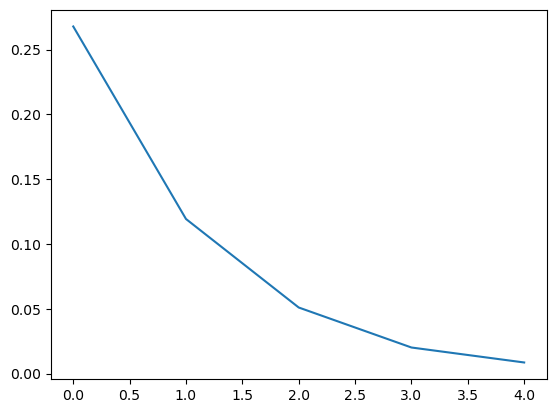

In [57]:
import matplotlib.pyplot as plt

plt.plot(torch.arange(len(losses_plt)), losses_plt)

Ошибка loss снижается в зависимоти от номера эпохи -> оно даже правильно работает

In [58]:
test_loop(test_dataloader, model, loss_fn)

Test Error: 
 Accuracy: 90.0%, Avg loss: 0.396828 



In [59]:
# Прогоняем модель на тестовой выборке
y_pred = []
y_true = []

for inputs, labels in test_dataloader:
        output = model(inputs) # Feed Network
        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [60]:
# Получаем метрики модели, полученные по  тестовой выборке
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.89      0.92      0.90      5626
    Positive       0.91      0.88      0.90      5574

    accuracy                           0.90     11200
   macro avg       0.90      0.90      0.90     11200
weighted avg       0.90      0.90      0.90     11200



Имеем достаточно хорошую точность. Precision и Recall достаточно хорошие. Можно сказать, что за короткий промежуток времени обучения мы получили хорошую точность модели.

In [66]:
names_list = [
"I was here 2 weeks ago. The staff was sociable and recommended the dish of the day to me. Everything was excellent",
"I absolutely did not like this service. The meat was cold. I asked to redo it, but it already spoiled my mood"
 ]

targets_list = ["Positive", "Negative"]
targets_dict = {1:"Positive", 0: "Negative"}

for name, target in zip(names_list, targets_list):

    x_test, y_test = review_dataset.vectorize(preprocess_text(name)), target
    predict = model(x_test.unsqueeze(0))
    pred_proba, pred_label_indices = nn.functional.softmax(predict, 1).topk(1, dim=1)
    
    res = pred_label_indices.squeeze()
    print(res)
    pred_labels = targets_dict[pred_label_indices.squeeze().item()]
    
    targets_list
    
    print(f"Review: \n{name}")
    print(f"True    : {target}")
    print(f"Predicts: {pred_labels}\n")

tensor(1)
Review: 
I was here 2 weeks ago. The staff was sociable and recommended the dish of the day to me. Everything was excellent
True    : Positive
Predicts: Positive

tensor(0)
Review: 
I absolutely did not like this service. The meat was cold. I asked to redo it, but it already spoiled my mood
True    : Negative
Predicts: Negative



Вывод всех метрик

In [67]:
print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

              precision    recall  f1-score   support

    Negative       0.89      0.92      0.90      5626
    Positive       0.91      0.88      0.90      5574

    accuracy                           0.90     11200
   macro avg       0.90      0.90      0.90     11200
weighted avg       0.90      0.90      0.90     11200



Почему так все хорошо и все метрики 90%+ (precision, recall, f1): Скорее всего это из-за того, что используется только 2 класса (т.е. бинарная классификация). Если бы было большее кол-во классов, то ситуация была бы хуже 